**<h1>DATA SCIENCE 1/3 AUTO**

<h1>Training AutoML Medische Data

<h3> Install dependencies

In [ ]:
!pip install h2o 
!pip install panda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<h3> Import Libraries

In [ ]:
import h2o
from h2o.automl import H2OAutoML
from h2o.frame import H2OFrame
import pandas as pd

h2o.init()

from google.colab import drive
drive.mount('/content/gdrive')

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,11 hours 45 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_unknownUser_l8nrta
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.065 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<h3> Load Data

In [ ]:
data= "/content/gdrive/My Drive/Datasets/Medische_dataset/medisch-centrum-randstad.csv"

data = pd.read_csv(data)
# Convert dataframe into H2O
data = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


<h3>Data Split

In [ ]:
training_data, test_data = data.split_frame(ratios=[0.8], seed = 1)

<h4> Check training Data

In [ ]:
training_data

genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
80,183,101,0,4,8,4,57
76,188,65,1,17,8,4,59
80,169,96,2,7,9,3,69
81,179,93,3,14,9,1,84
79,200,71,1,1,9,2,78
84,175,70,2,3,0,2,97
80,185,65,1,6,9,3,66
81,181,91,1,0,1,3,82
78,172,81,1,9,7,2,68
79,168,82,3,0,6,2,92


<h4> Check test Data

In [ ]:
test_data

genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
80,190,94,2,12,5,3,73
81,188,83,1,16,6,3,64
78,172,92,1,8,0,3,70
81,179,77,2,1,2,2,88
78,182,97,2,5,9,4,76
78,195,78,3,12,4,2,92
81,166,103,1,6,4,3,65
81,202,64,1,13,5,1,77
80,184,80,2,19,6,2,74
78,182,70,0,12,8,3,54


<H3> Train base models on the training set

In [ ]:
aml = H2OAutoML(max_runtime_secs=600, max_models=10)
aml.train(x=["genetic", "length", "mass", "exercise", "smoking", "alcohol", "sugar"], y="lifespan", training_frame=training_data)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,2.3311841,0.0609508,2.3066473,2.2768772,2.283227,2.3725686,2.4166014
mean_residual_deviance,8.061085,0.3376782,8.006064,7.847123,7.7245245,8.128604,8.599107
mse,8.061085,0.3376782,8.006064,7.847123,7.7245245,8.128604,8.599107
null_deviance,78271.43,3509.9688,77897.35,77160.59,78148.94,83902.08,74248.195
r2,0.9320723,0.0042681,0.9306189,0.9333381,0.9360403,0.9349917,0.9253727
residual_deviance,5306.7686,228.01369,5404.0933,5139.8657,4997.767,5454.293,5537.8247
rmse,2.8387134,0.0590565,2.829499,2.8012717,2.7793028,2.8510706,2.9324234
rmsle,0.0373165,0.0008817,0.0371866,0.0369019,0.0361651,0.0378842,0.0384448


<h4> Predict test Data

In [ ]:
predictions = aml.predict(test_data)
predictions

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict
75.0416
64.5671
69.6591
92.4604
70.9212
89.9034
67.3603
79.3461
73.0753
56.2507


<h4>Create a data frame containing the input sample

In [ ]:

input_data = pd.DataFrame(
    data={
        "genetic": [76.0],
        "length": [188.0],
        "mass": [65.0],
        "exercise": [1.0],
        "smoking": [17.0],
        "alcohol": [8.0],
        "sugar": [4.0],
    }
)

# Generate the prediction
input_data = H2OFrame(input_data)
prediction = aml.predict(input_data)
prediction


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict
57.865


<h4> Leaderboard

In [ ]:
lb = h2o.automl.get_leaderboard(aml, extra_columns='ALL')
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_1_AutoML_2_20221216_114829,2.83777,8.05294,2.3329,0.0373161,8.05294,1655,0.147935,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20221216_114829,2.83898,8.0598,2.33212,0.0373194,8.0598,1593,0.1031,StackedEnsemble
GLM_1_AutoML_2_20221216_114829,2.84661,8.1032,2.34105,0.0374215,8.1032,62,0.000823,GLM
GBM_3_AutoML_2_20221216_114829,3.13685,9.83981,2.55342,0.0413832,9.83981,521,0.033296,GBM
GBM_2_AutoML_2_20221216_114829,3.14638,9.8997,2.56103,0.0414684,9.8997,490,0.029101,GBM
GBM_1_AutoML_2_20221216_114829,3.15914,9.98016,2.58254,0.0414149,9.98016,727,0.026598,GBM
GBM_4_AutoML_2_20221216_114829,3.24213,10.5114,2.62259,0.0428381,10.5114,694,0.027454,GBM
XGBoost_3_AutoML_2_20221216_114829,3.25897,10.6209,2.65225,0.0430254,10.6209,248,0.003603,XGBoost
XGBoost_1_AutoML_2_20221216_114829,3.41157,11.6388,2.75296,0.044964,11.6388,548,0.008275,XGBoost
XGBoost_2_AutoML_2_20221216_114829,3.4437,11.8591,2.78694,0.0453894,11.8591,512,0.007668,XGBoost


In [ ]:
best_model = aml.get_best_model()
best_model.summary()

'No summary for this model'

In [ ]:
model = h2o.get_model('GLM_1_AutoML_1_20221216_00301')
model

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20221216_00301


GLM Model: summary
    family    link      regularization               lambda_search                                                                  number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  -----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------------------------------------
    gaussian  identity  Ridge ( lambda = 7.369E-4 )  nlambda = 30, lambda.max = 736.9, lambda.min = 7.369E-4, lambda.1se = 0.02069  7                             7                              30                      AutoML_1_20221216_00301_training_py_2_sid_a443

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 8.06577853684074
RMSE: 2.8400314323684412
MAE: 2.335629456124581
RMSLE: 0.03733735611020049
Mean Residual Deviance: 8.06577853684074
R^2: 0.9321454538160112
Null degrees of freedom: 3291
Residual degrees of freedom: 3284
Null deviance: 391315.60722964763
Residual deviance: 26552.54294327972
AIC: 16232.770051693755

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 8.103198753352089
RMSE: 2.846611802362958
MAE: 2.3410458317134286
RMSLE: 0.03742153159344851
Mean Residual Deviance: 8.103198753352089
R^2: 0.9318306507504563
Null degrees of freedom: 3291
Residual degrees of freedom: 3284
Null deviance: 392101.41209694307
Residual deviance: 26675.730296035075
AIC: 16248.007573582638

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     2.33972    0.0740541    2.352         2.3912        2.29482       2.42234       2.23826
mean_residual_deviance  8.10183    0.39229      8.22604       8.34151       7.91186       8.51058       7.51914
mse                     8.10183    0.39229      8.22604       8.34151       7.91186       8.51058       7.51914
null_deviance           78420.3    5092.56      83373.4       76292.1       70554.9       81172.4       80708.6
r2                      0.931336   0.00552691   0.934611      0.927934      0.924515      0.93099       0.938633
residual_deviance       5334.32    260.085      5420.96       5497.05       5206.01       5599.96       4947.59
rmse                    2.84569    0.0693628    2.86811       2.88817       2.8128        2.91729       2.74211
rmsle                   0.0374067  0.000878955  0.0374082     0.0382338     0.0371131     0.0381824     0.0360959

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train      deviance_xval       deviance_se          alpha    iterations    training_rmse       training_deviance    training_mae       training_r2
---  -------------------  ----------  -----------  --------  ------------  ------------------  ------------------  -------------------  -------  ------------  ------------------  -------------------  -----------------  ------------------
     2022-12-16 00:03:10  0.000 sec   1            .74E3     8             118.56380222646015  118.86212200292991  3.4424879724482857   0.0
     2022-12-16 00:03:10  0.003 sec   2            .46E3     8             118.37838361011467  118.71361764933071  3.438662464934215    0.0
     2022-12-16 00:03:10  0.004 sec   3            .28E3     8             118.08078572930901  118.47511120199772  3.432516954363044    0.0
     2022-12-16 00:03:10  0.005 sec   4            .18E3     8             117.60409689479862  118.09267060830923  3.42265768358354     0.0
     2022-12-16 00:03:10  0.009 sec   5            .11E3     8             116.84298099832833

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

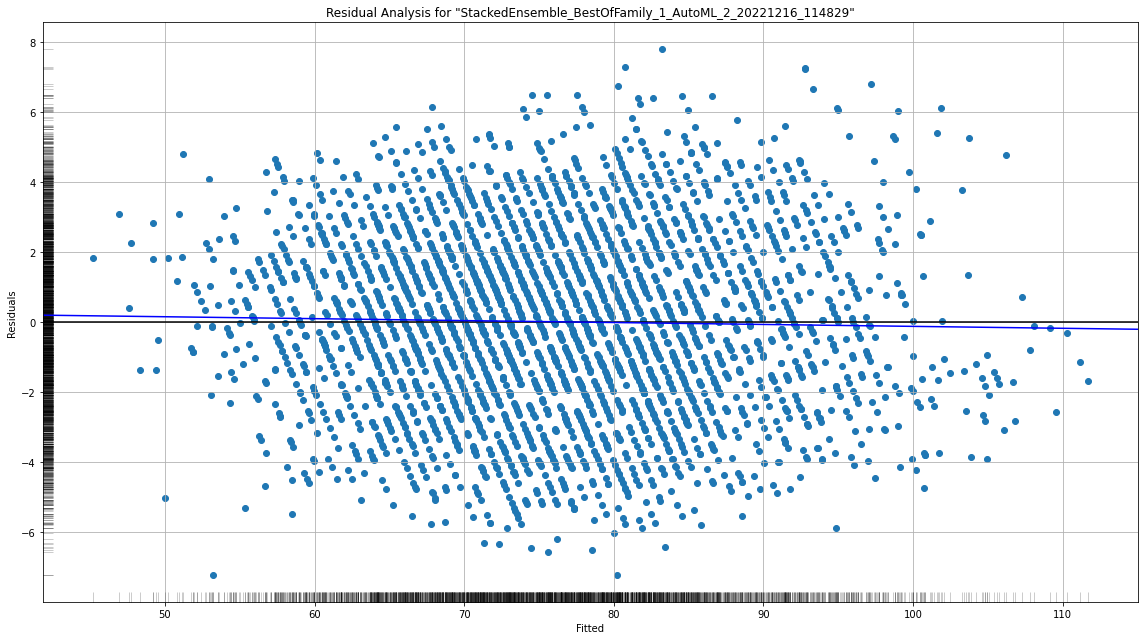

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

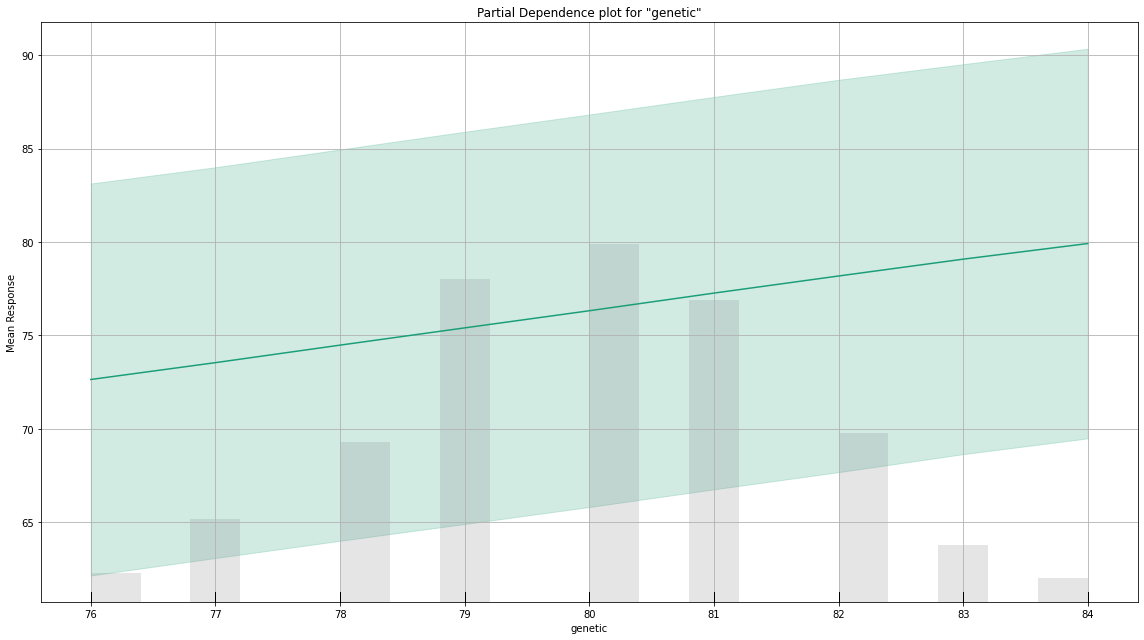

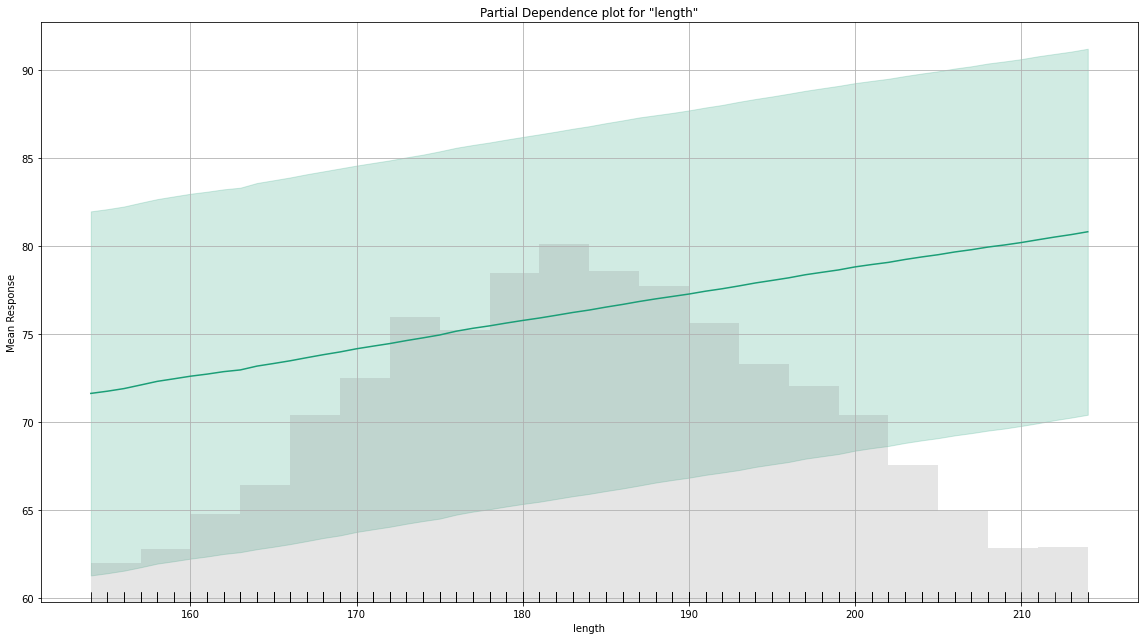

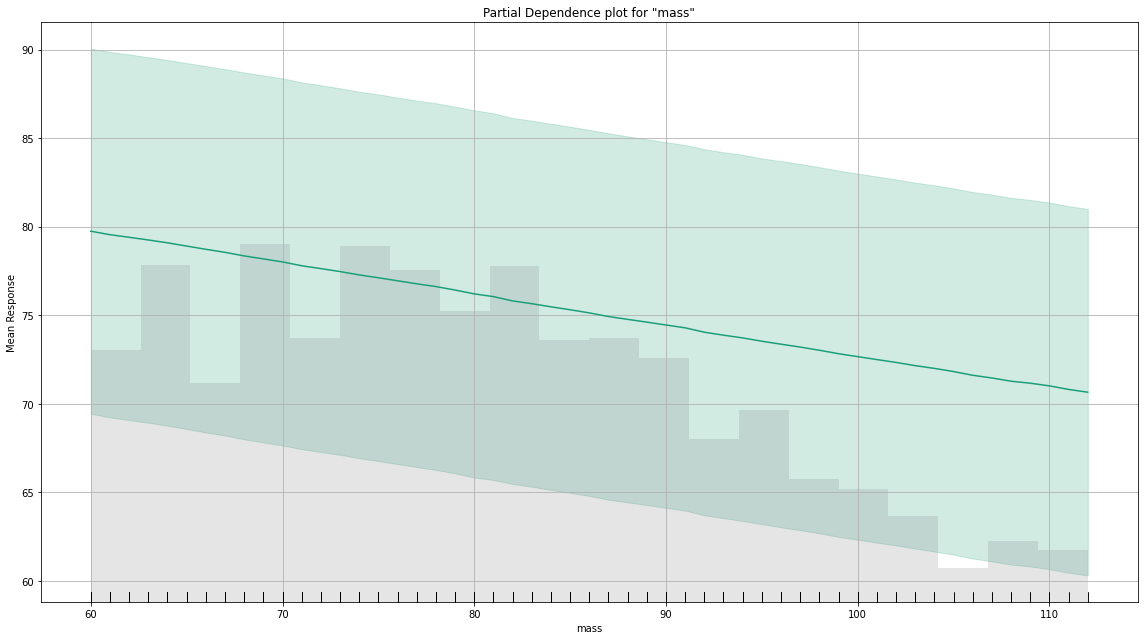

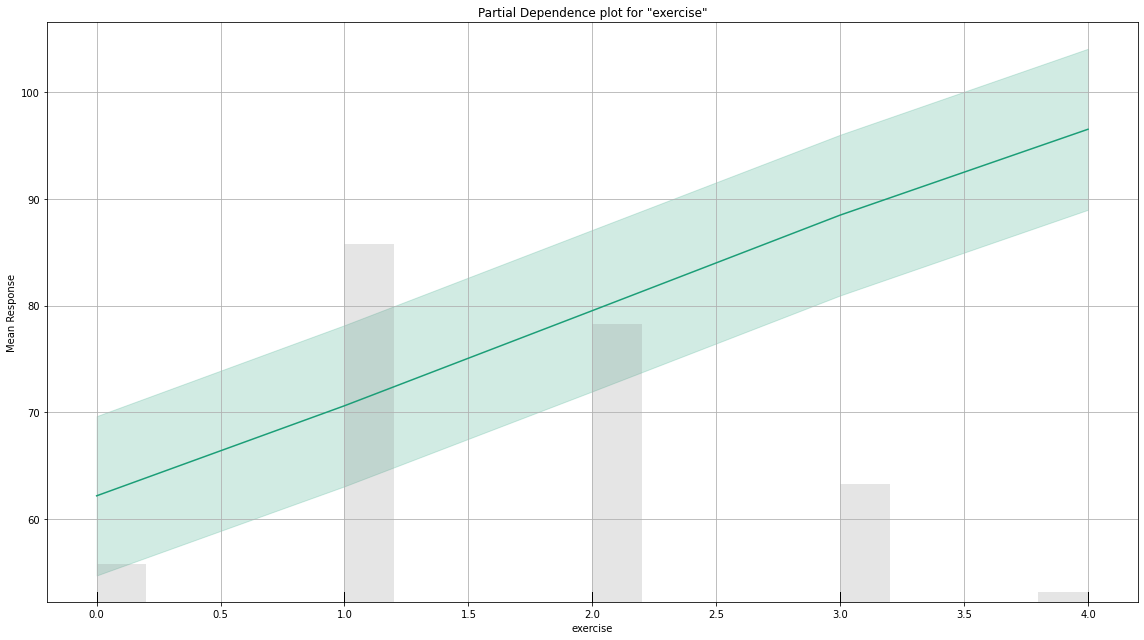

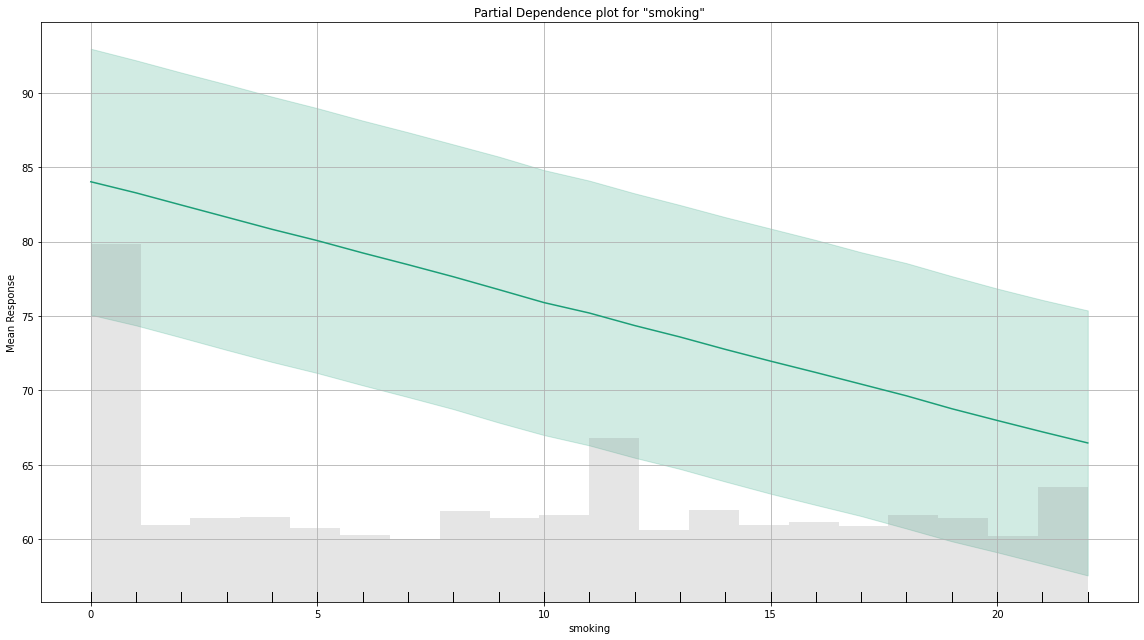

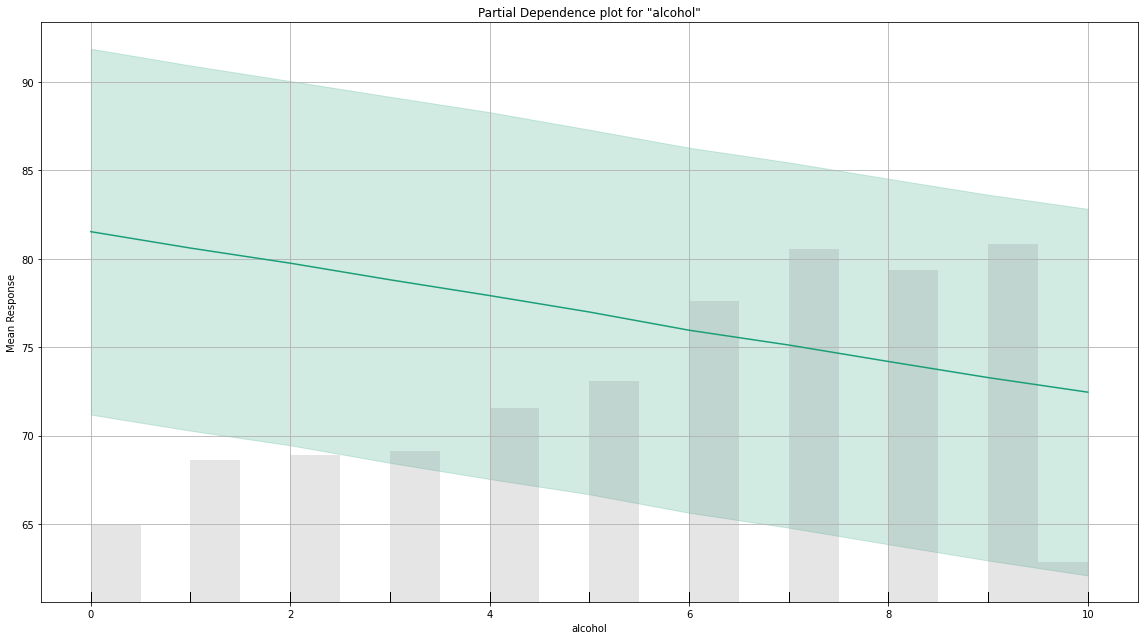

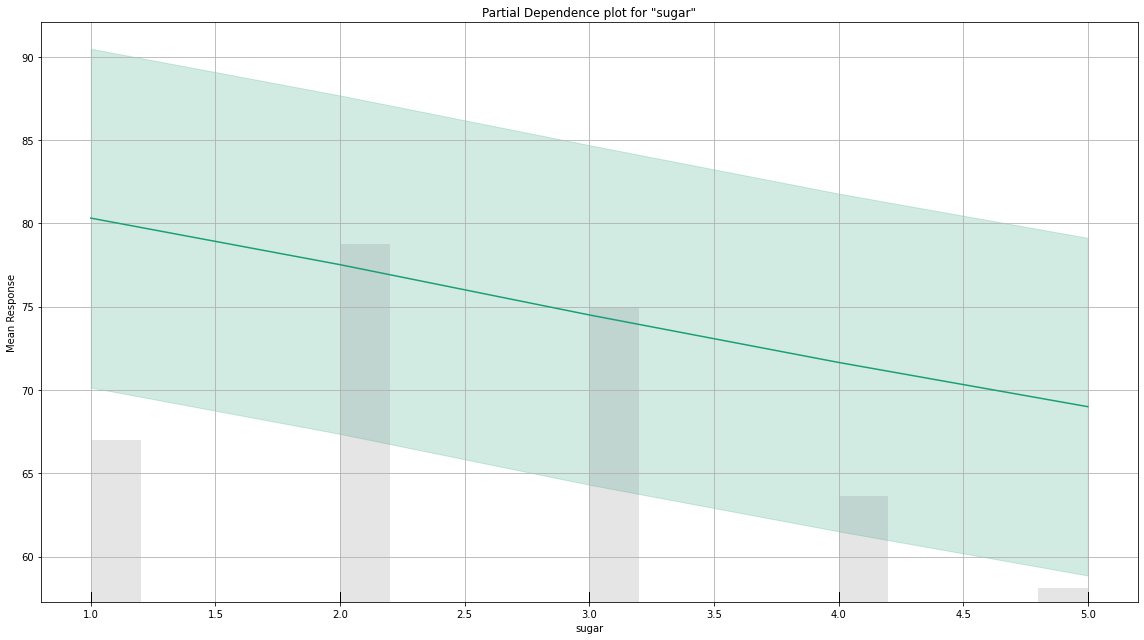

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

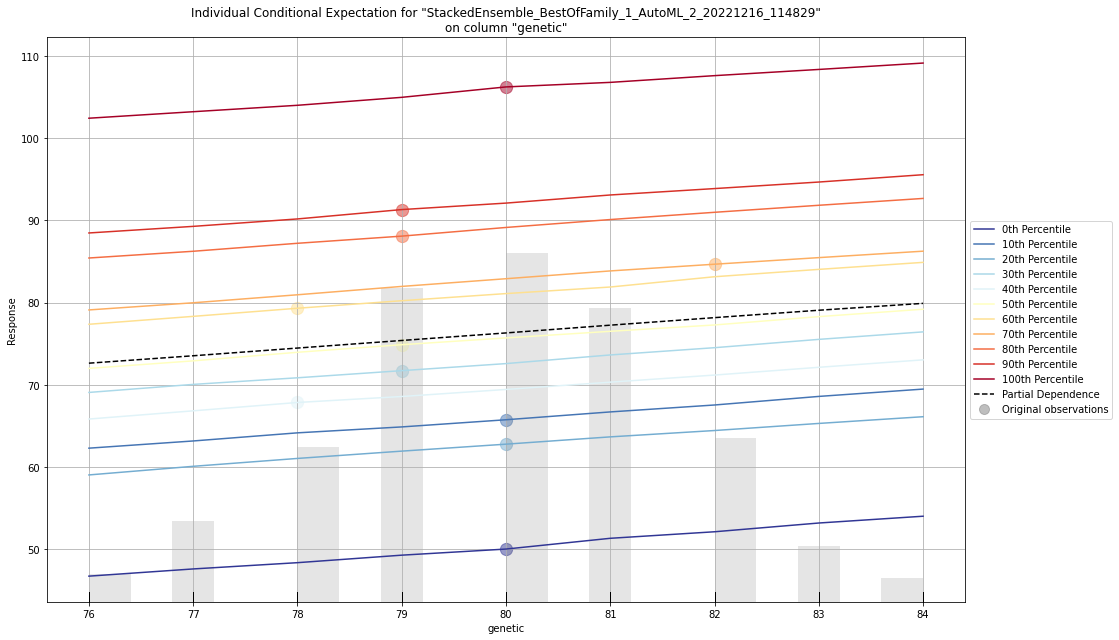

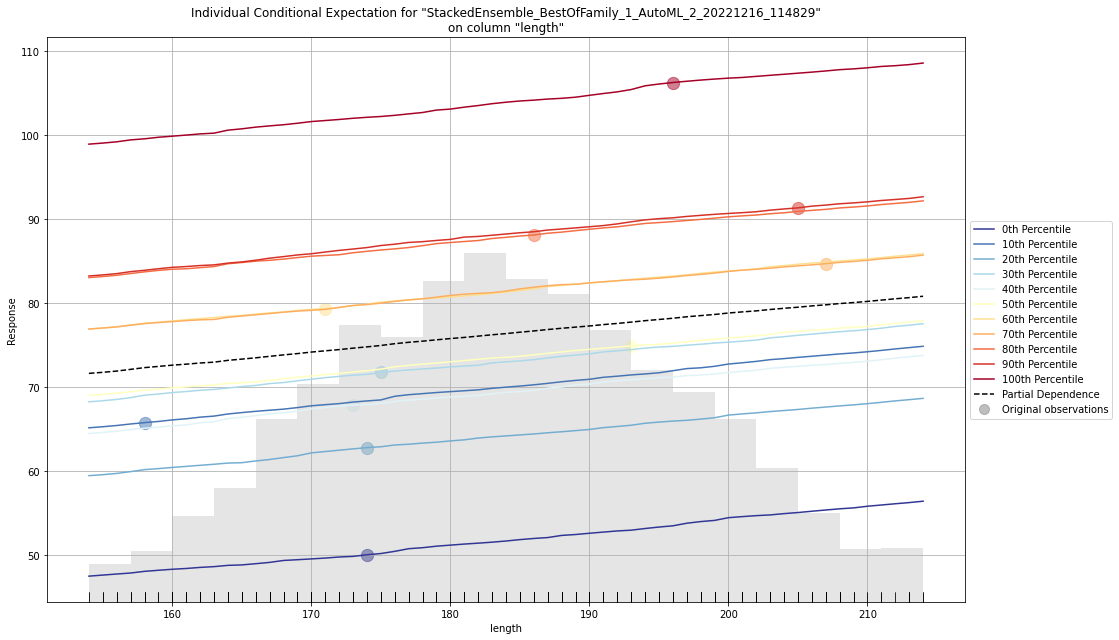

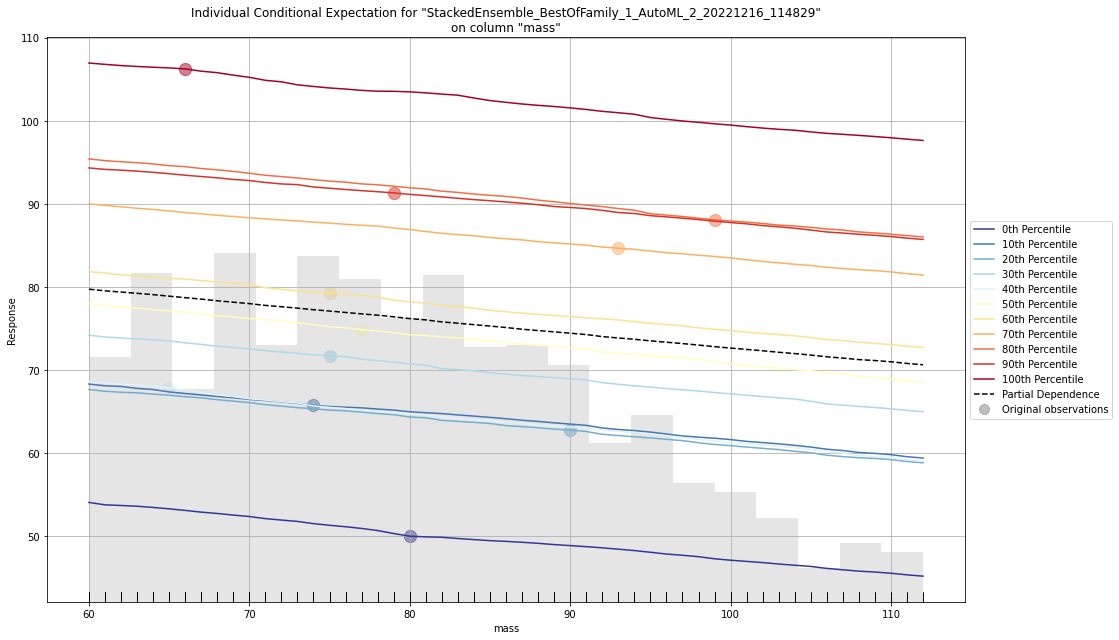

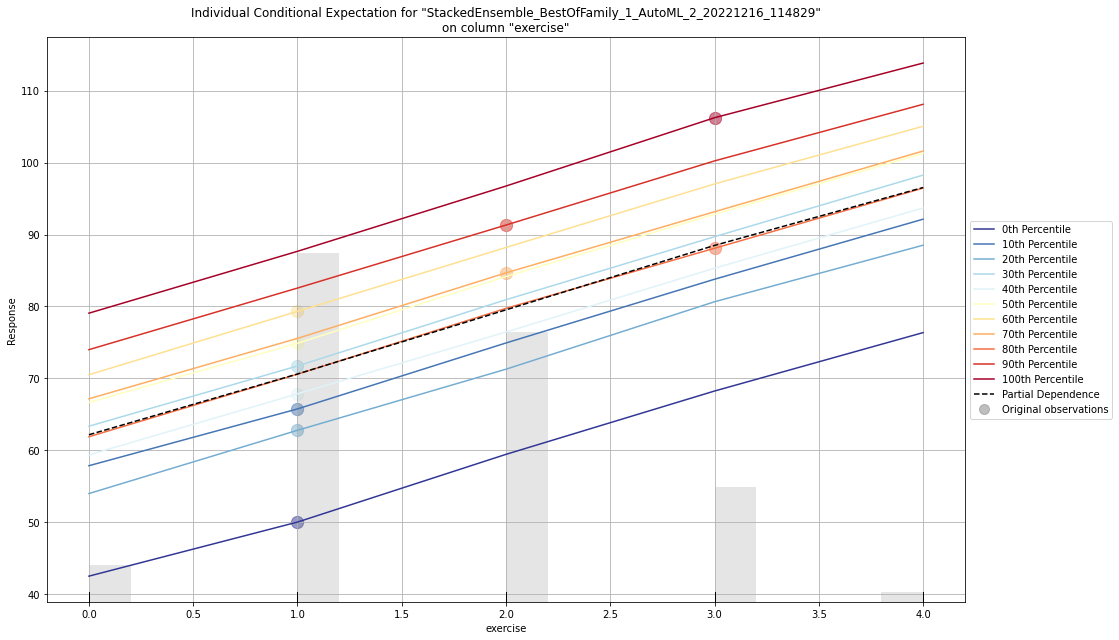

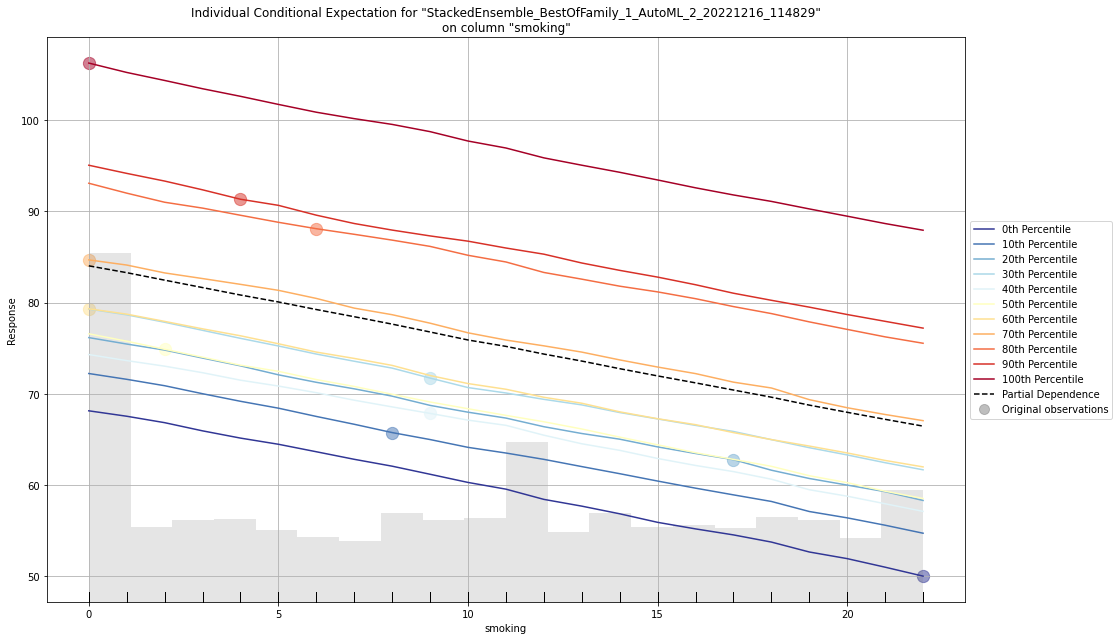

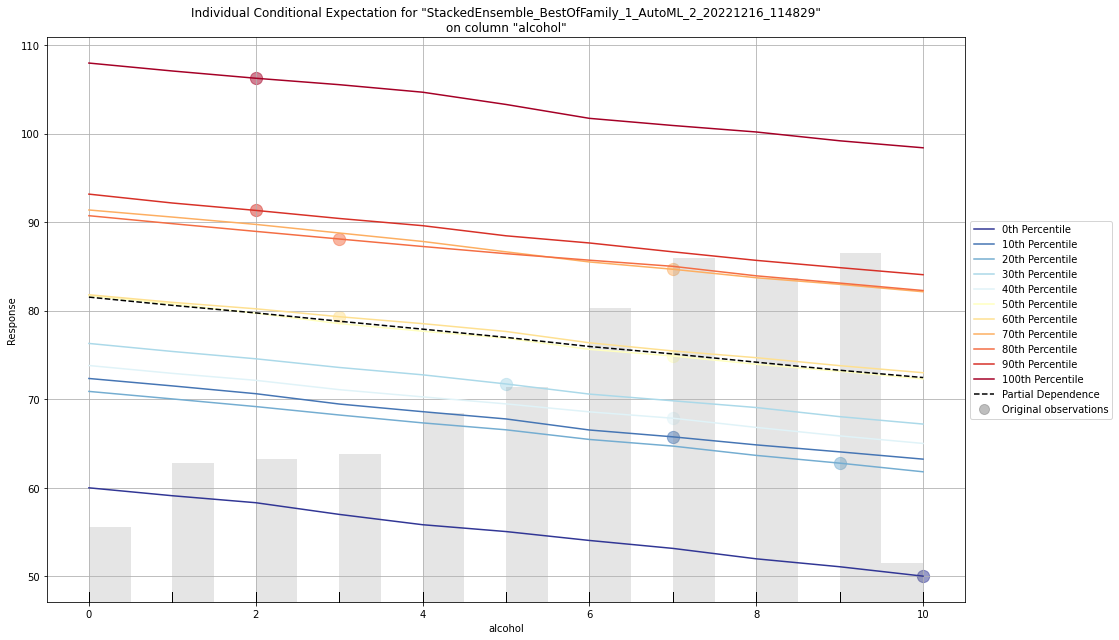

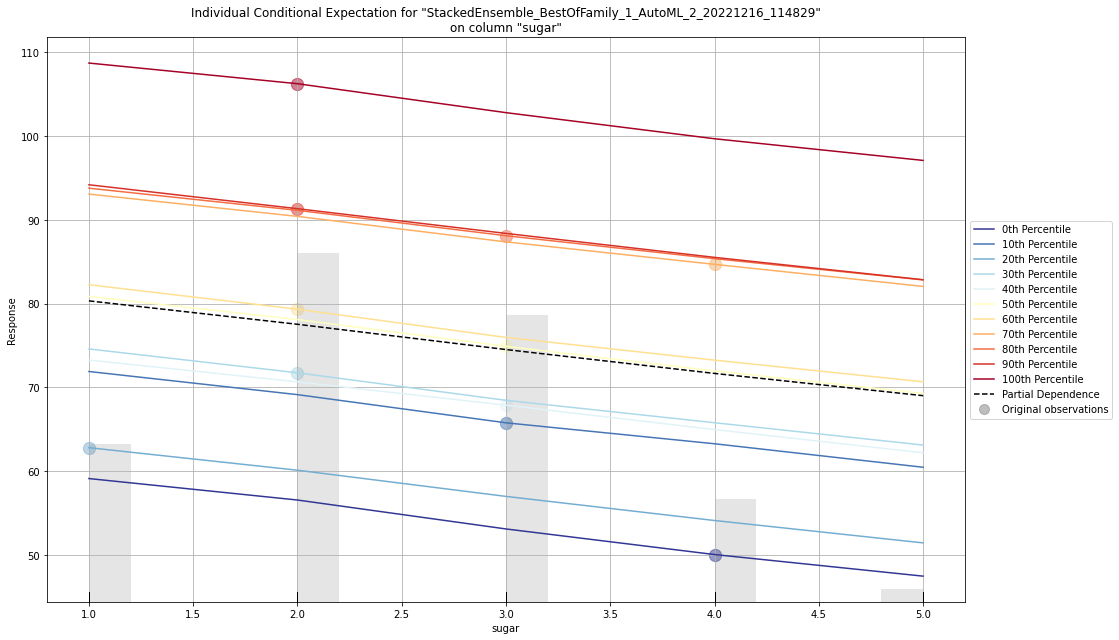

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [ ]:
best_model.explain(training_data)

<h3> Save Model

In [ ]:
h2o.save_model(model, "/content/gdrive/My Drive/Datasets/Medische_dataset/Medische_data_model_Auto.h2o")


'/content/gdrive/My Drive/Datasets/Medische_dataset/Medische_data_model_Auto.h2o/GLM_1_AutoML_1_20221216_00301'

In [ ]:
h2o.save_model(model, path="/content/gdrive/My Drive/Datasets/Medische_dataset/Medische_data_model_Auto.pkl", force=True)

'/content/gdrive/My Drive/Datasets/Medische_dataset/Medische_data_model_Auto.pkl/GLM_1_AutoML_1_20221216_00301'